In [1]:
import pandas as pd

file_path = 'datasets/iris_dataset/iris.data'

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(file_path, header=None, names=columns)

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


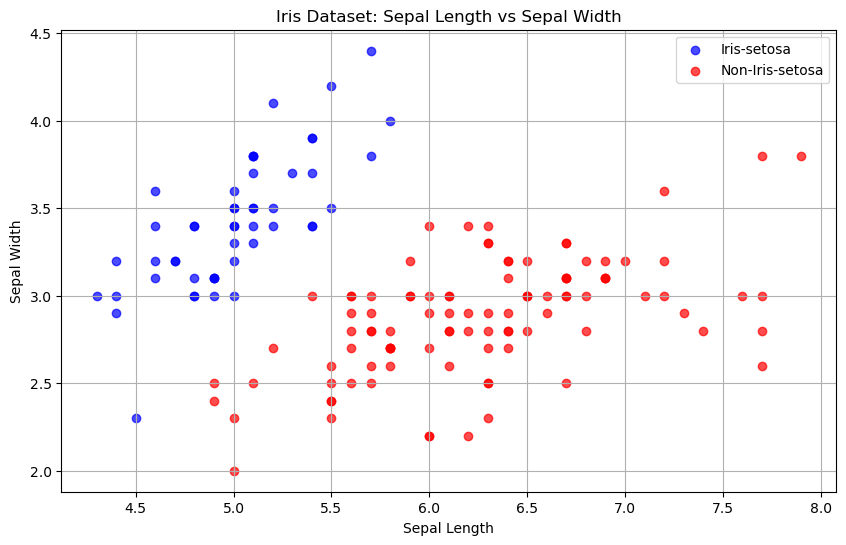

In [2]:
import matplotlib.pyplot as plt

# Create a scatter plot for the raw data, with different colors
setosa = iris_data[iris_data['species'] == 'Iris-setosa']
non_setosa = iris_data[iris_data['species'] != 'Iris-setosa']

plt.figure(figsize=(10, 6))

# Plot Iris-setosa points
plt.scatter(setosa['sepal_length'], setosa['sepal_width'], color='blue', label='Iris-setosa', alpha=0.7)

# Plot non-Iris-setosa points
plt.scatter(non_setosa['sepal_length'], non_setosa['sepal_width'], color='red', label='Non-Iris-setosa', alpha=0.7)

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


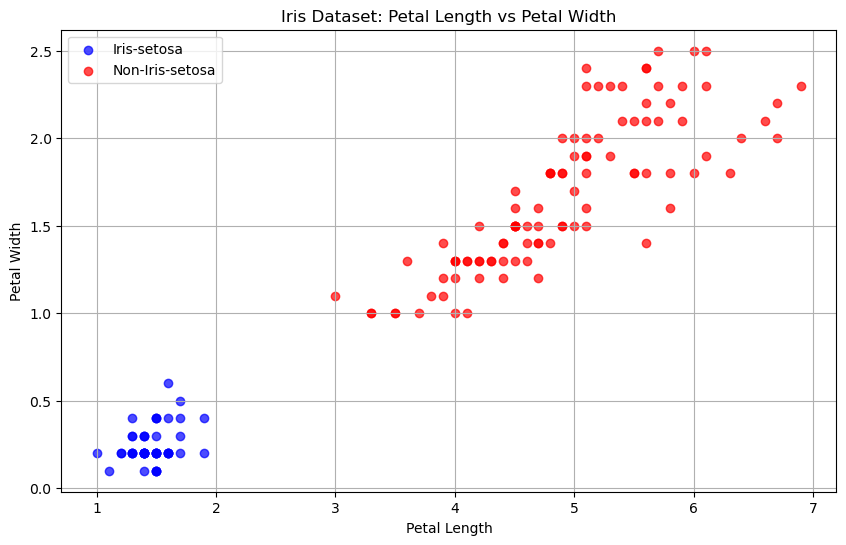

In [3]:
import matplotlib.pyplot as plt

# Create a scatter plot for the raw data, with different colors
setosa = iris_data[iris_data['species'] == 'Iris-setosa']
non_setosa = iris_data[iris_data['species'] != 'Iris-setosa']

plt.figure(figsize=(10, 6))

# Plot Iris-setosa points
plt.scatter(setosa['petal_length'], setosa['petal_width'], color='blue', label='Iris-setosa', alpha=0.7)

# Plot non-Iris-setosa points
plt.scatter(non_setosa['petal_length'], non_setosa['petal_width'], color='red', label='Non-Iris-setosa', alpha=0.7)

# Add labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset: Petal Length vs Petal Width')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


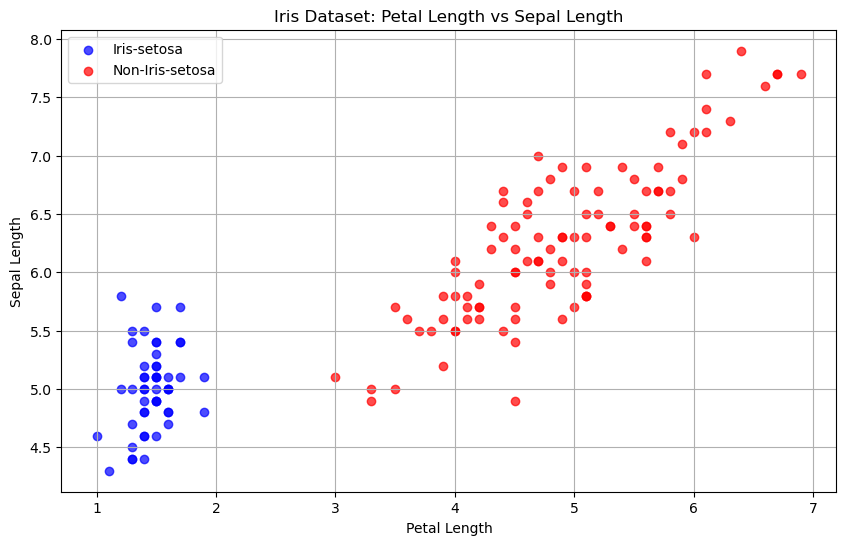

In [4]:
import matplotlib.pyplot as plt

# Create a scatter plot for the raw data, with different colors 
setosa = iris_data[iris_data['species'] == 'Iris-setosa']
non_setosa = iris_data[iris_data['species'] != 'Iris-setosa']

plt.figure(figsize=(10, 6))

# Plot Iris-setosa points
plt.scatter(setosa['petal_length'], setosa['sepal_length'], color='blue', label='Iris-setosa', alpha=0.7)

# Plot non-Iris-setosa points
plt.scatter(non_setosa['petal_length'], non_setosa['sepal_length'], color='red', label='Non-Iris-setosa', alpha=0.7)

# Add labels and title
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Iris Dataset: Petal Length vs Sepal Length')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


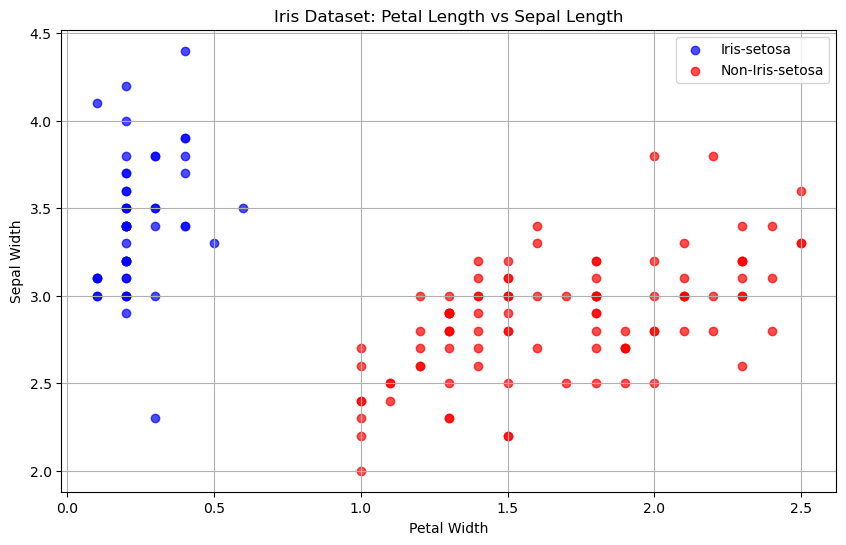

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot for the raw data, with different colors
setosa = iris_data[iris_data['species'] == 'Iris-setosa']
non_setosa = iris_data[iris_data['species'] != 'Iris-setosa']

plt.figure(figsize=(10, 6))

# Plot Iris-setosa points
plt.scatter(setosa['petal_width'], setosa['sepal_width'], color='blue', label='Iris-setosa', alpha=0.7)

# Plot non-Iris-setosa points
plt.scatter(non_setosa['petal_width'], non_setosa['sepal_width'], color='red', label='Non-Iris-setosa', alpha=0.7)

# Add labels and title
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Petal Length vs Sepal Length')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [6]:
import numpy as np

# Assign +1 for "Iris-setosa" and -1 for other species
iris_data['label'] = np.where(iris_data['species'] == 'Iris-setosa', 1, -1)
iris_data.drop(['species'], axis=1, inplace=True)
iris_data

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1


In [8]:
from sklearn.metrics import confusion_matrix
from quadprog import solve_qp

X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_data['label'].values

n, d = X.shape

# Add a column of ones to X for the intercept term
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Prepare matrices for quadprog
G = np.dot(X.T, X)
a = np.dot(X.T, y)
C = np.zeros((d + 1, 1))
b = np.zeros(1)

# Solve the quadratic programming problem
solution = solve_qp(G, a, C, b)
beta = solution[0]

# Separate beta and mu
beta_coeff = beta[:-1]
mu = beta[-1]

# Make predictions
y_pred = np.sign(np.dot(X[:, :-1], beta_coeff) + mu)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = np.sum(y == y_pred) / len(y)
print(f"\nAccuracy: {accuracy:.4f}")

# Print coefficients
print("\nCoefficients (beta):")
for i, coef in enumerate(beta_coeff):
    print(f"Feature {i+1}: {coef:.4f}")
print(f"Intercept (mu): {mu:.4f}")

Confusion Matrix:
[[100   0]
 [  0  50]]

Accuracy: 1.0000

Coefficients (beta):
Feature 1: 0.1313
Feature 2: 0.4849
Feature 3: -0.4455
Feature 4: -0.1267
Intercept (mu): -0.7551


Question 2:

In [19]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_data['label'].values

# Perform SVD
U, s, Vt = np.linalg.svd(X.T) # We transpose the data because we want to perform SVD on the features, not the samples.
print(f"U: {U}")
print(f"s: {s}")
print(f"V.T: {Vt}")

U: [[-0.75116805 -0.28583096  0.49942378  0.32345496]
 [-0.37978837 -0.54488976 -0.67502499 -0.32124324]
 [-0.51315094  0.70889874 -0.05471983 -0.48077482]
 [-0.16787934  0.34475845 -0.54029889  0.74902286]]
s: [95.95066751 17.72295328  3.46929666  1.87891236]
V.T: [[-6.16171172e-02 -5.80722977e-02 -5.67633852e-02 ... -9.40702260e-02
  -9.48993908e-02 -8.84882764e-02]
 [-1.29969428e-01 -1.11371452e-01 -1.18294769e-01 ...  4.98348018e-02
   5.62107520e-02  5.16210172e-02]
 [-5.58364155e-05  6.84386629e-02  2.31062793e-03 ... -4.14958083e-02
  -2.12386574e-01 -9.51442925e-02]
 ...
 [-9.34637342e-02  3.66755322e-02  3.08252776e-02 ...  9.81822841e-01
  -2.14264126e-02 -8.52768485e-03]
 [-9.60224157e-02 -3.24463474e-02  1.95234663e-01 ... -2.17978813e-02
   9.42038920e-01 -3.02139863e-02]
 [-8.09922905e-02  1.27273399e-02  1.35567696e-01 ... -8.85972146e-03
  -2.96933496e-02  9.73577349e-01]]


In [18]:
# Choose the first two singular values
k = 2
X_hat = (U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :])

In [11]:
# Reduce dimension
X_reduced = (U[:, :k].T @ X_hat).T

In [12]:
def train_and_evaluate(X):
    n, d = X.shape
    
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    
    G = np.dot(X.T, X)
    a = np.dot(X.T, y)
    C = np.zeros((d + 1, 1))
    b = np.zeros(1)

    solution = solve_qp(G, a, C, b)
    beta = solution[0]

    beta_coeff = beta[:-1]
    mu = beta[-1]

    y_pred = np.sign(np.dot(X[:, :-1], beta_coeff) + mu)

    cm = confusion_matrix(y, y_pred)

    accuracy = np.sum(y == y_pred) / len(y)

    return cm, accuracy, beta


In [13]:
# Evaluate full-dimension classifier
cm_full, acc_full, beta_full = train_and_evaluate(X)

In [14]:
# Evaluate reduced-dimension classifier
cm_reduced, acc_reduced, beta_reduced = train_and_evaluate(X_reduced)

Full-dimension Confusion Matrix:
[[100   0]
 [  0  50]]
Full-dimension Accuracy: 1.0000

Reduced-dimension Confusion Matrix:
[[100   0]
 [  0  50]]
Reduced-dimension Accuracy: 1.0000


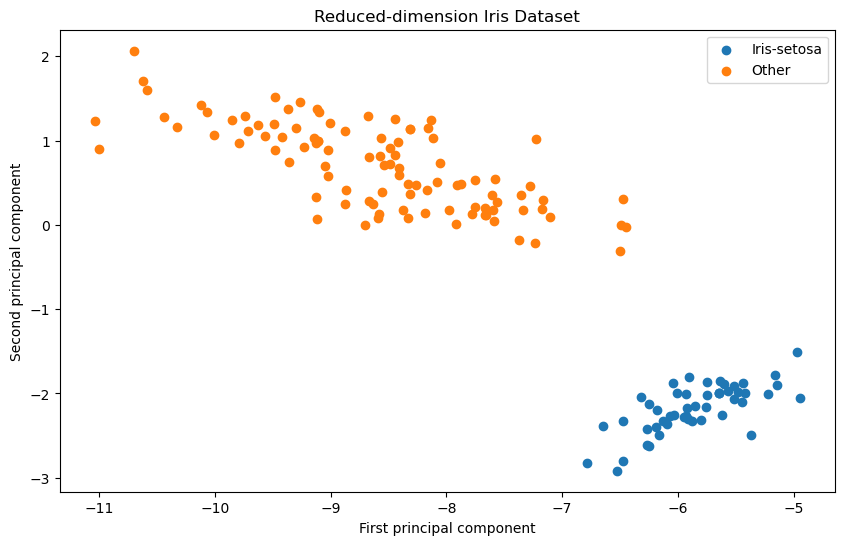

In [15]:
print("Full-dimension Confusion Matrix:")
print(cm_full)
print(f"Full-dimension Accuracy: {acc_full:.4f}")

print("\nReduced-dimension Confusion Matrix:")
print(cm_reduced)
print(f"Reduced-dimension Accuracy: {acc_reduced:.4f}")

# Plot reduced-dimension dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], label='Iris-setosa')
plt.scatter(X_reduced[y == -1, 0], X_reduced[y == -1, 1], label='Other')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Reduced-dimension Iris Dataset')
plt.legend()
plt.show()

Interpretention: 
1. The full-dimension and reduced-dimension classifiers achieve identical confusion matrices and perfect accuracy (1.0000).
2. The confusion matrices show that, all 100 samples of the other two species were accurately identified as -1, whereas all 50 samples of Iris-setosa were correctly classified as +1.
3. The classifier's performance remained unchanged when the dimensions were reduced.

The following reasons explains why the performance didn't change significantly when the dimensions were reduced:
1. We can visually see through the plots, there's a clear linear separability of Iris-setosa from the other species, so Iris-setosa is easily distinguishable.
2. Information preservation through SVD and dimension reduction.
3. The least-squares classifier's capability to find a good decision boundary in the reduced space. 